In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from mpl_toolkits.basemap import Basemap
from haversine import haversine, Unit


def great_circle_distance(p1, p2):
    return haversine(p1, p2, unit='km')

In [2]:
df = pd.read_csv('data/coordinates.csv')
coordinates = df[['Longitude', 'Latitude']]
display(df)

,Heading,City,Country code,Latitude,Longitude
0,Zika Outbreak Hits Miami,Miami,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,US,25.79065,-80.13005
3,"Mystery Virus Spreads in Recife, Brazil",Recife,BR,-8.05389,-34.88111
4,Dallas man comes down with case of Zika,Dallas,US,44.91928,-123.31705
5,Trinidad confirms first Zika case,Trinidad,BO,-14.83333,-64.90000
6,Zika Concerns are Spreading in Houston,Houston,US,29.76328,-95.36327
7,Geneve Scientists Battle to Find Cure,Genève,CH,46.20222,6.14569
8,The CDC in Atlanta is Growing Worried,Atlanta,US,33.74900,-84.38798
9,Zika Infested Monkeys in Sao Paulo,São Paulo,BR,-23.54750,-46.63611


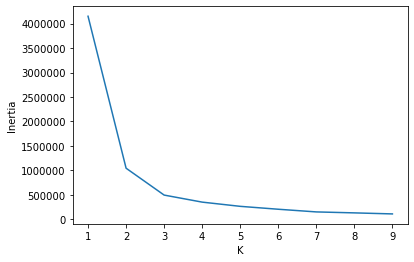

In [3]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(coordinates).inertia_
                  for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

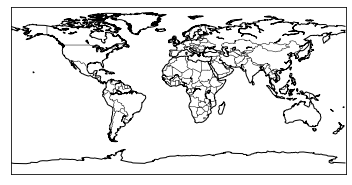

In [4]:
map_plotter = Basemap()

map_plotter.drawcoastlines()
map_plotter.drawcountries()

In [5]:
# use_model = 'kmeans'
use_model = 'dbscan'

In [6]:
cluster_model_kmeans = KMeans(n_clusters=7)
predicted_kmeans = cluster_model_kmeans.fit_predict(coordinates)
df['Cluster K-means'] = predicted_kmeans

In [14]:
# cluster_model_dbscan = DBSCAN(eps=15.0, min_samples=10) # 1st try without great circle distance
cluster_model_dbscan = DBSCAN(eps=1500.0, min_samples=10, metric=great_circle_distance)
predicted_dbscan = cluster_model_dbscan.fit_predict(coordinates)
# coordinates.plot.scatter('Longitude', 'Latitude', c='cl', colormap='gist_rainbow')
df['Cluster DBSCAN'] = predicted_dbscan

In [15]:
display(df)

,Heading,City,Country code,Latitude,Longitude,Cluster K-means,Cluster DBSCAN
0,Zika Outbreak Hits Miami,Miami,US,25.77427,-80.19366,0,0
1,Could Zika Reach New York City?,New York City,US,40.71427,-74.00597,0,0
2,First Case of Zika in Miami Beach,Miami Beach,US,25.79065,-80.13005,0,0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,BR,-8.05389,-34.88111,4,0
4,Dallas man comes down with case of Zika,Dallas,US,44.91928,-123.31705,3,0
5,Trinidad confirms first Zika case,Trinidad,BO,-14.83333,-64.90000,4,0
6,Zika Concerns are Spreading in Houston,Houston,US,29.76328,-95.36327,0,0
7,Geneve Scientists Battle to Find Cure,Genève,CH,46.20222,6.14569,5,1
8,The CDC in Atlanta is Growing Worried,Atlanta,US,33.74900,-84.38798,0,0
9,Zika Infested Monkeys in Sao Paulo,São Paulo,BR,-23.54750,-46.63611,4,0


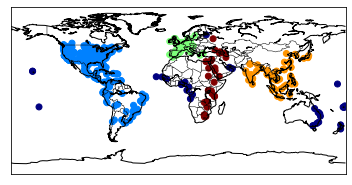

In [16]:
if use_model == 'kmeans':
    cluster_colormap = predicted_kmeans
elif use_model == 'dbscan':
    cluster_colormap = predicted_dbscan

map_plotter.drawcoastlines()
map_plotter.drawcountries()
map_plotter.scatter(coordinates['Longitude'], coordinates['Latitude'], c=cluster_colormap, latlon=True, cmap=plt.cm.jet)
plt.show()